#                    **IRIS FLOWER CLASSIFICATION**
---
The iris flower has three species: setosa, versicolor, and virginica, which differ according to their measurements.


Now we have to train a machine-learning model that can learn from the measurements of the iris species and classify them.


---



**Import Libraries**

In [158]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris



**Reading Dataset**



In [159]:
iris = pd.read_csv('iris.csv')

**First 5 rows from dataset**

In [160]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**last 5 rows from dataset**

In [161]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Random 5 rows**

In [162]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
74,6.4,2.9,4.3,1.3,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa


**Total rows and columns in dataset**

In [163]:
iris.shape

(150, 5)

In [164]:
print("Total Rows =",iris.shape[0])
print("Total Columns =",iris.shape[1])

Total Rows = 150
Total Columns = 5


#**DATA PROCESSING**

**Columns in dataset**

In [165]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Statistics summary of dataset**

In [166]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Dataset information**

In [167]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Counting value of each column**

In [168]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Check NULL values in dataset**

In [169]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**find unique values of species column**

In [170]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Size of dataset**

In [171]:

print("Size of dataset is: ",iris.size)

Size of dataset is:  750


# **DATA VISUALIZATION**

**Histograms**

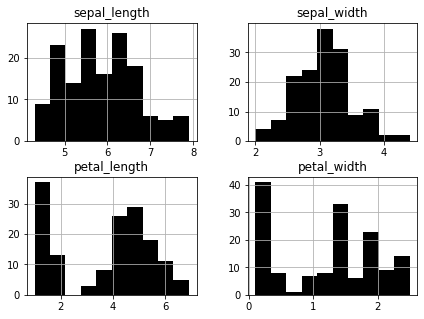

In [172]:
# histograms
iris.hist(color="black",figsize=(7,5))
plt.show()

**HeatMap**

In [173]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


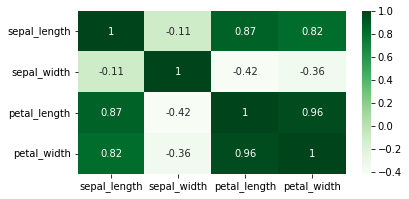

In [174]:
corr=iris.corr()
fig, ax = plt.subplots(figsize=(6,3))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'Greens')

**pairplot**

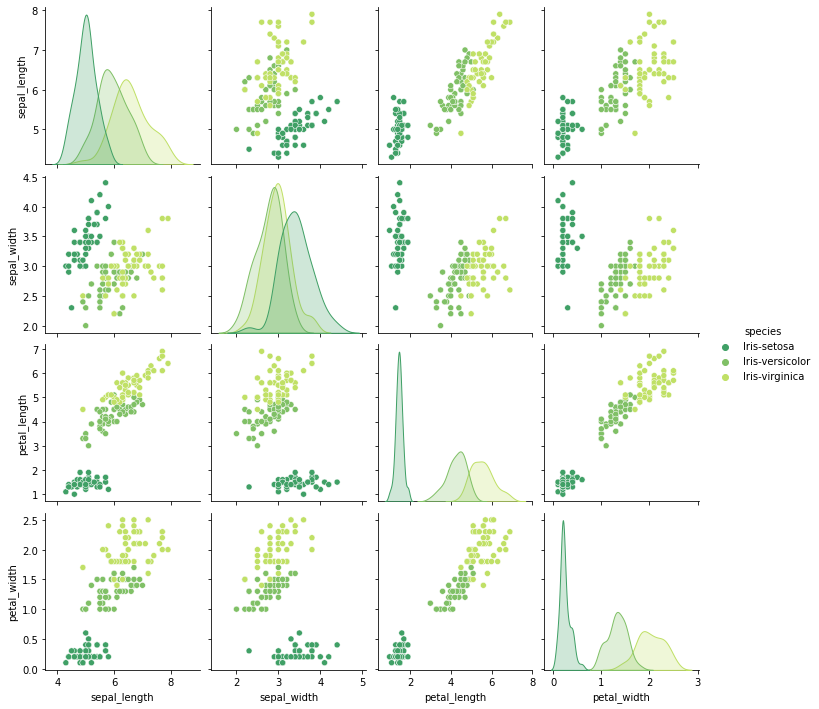

In [175]:
sns.pairplot(iris, hue = 'species', palette = 'summer')
plt.show()

**barplot**

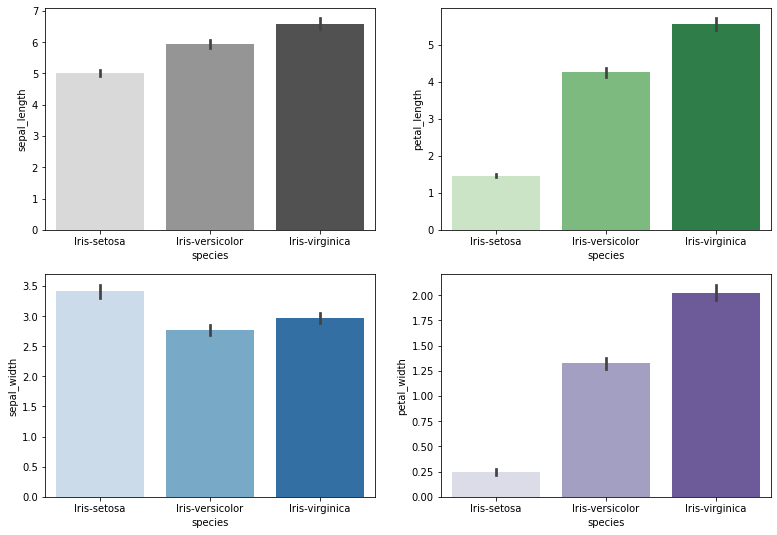

In [176]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.barplot(x="species",y="sepal_length",data=iris,palette ='Greys')
plt.subplot(2,2,4)
sns.barplot(x="species",y="petal_width",data=iris,palette ='Purples')
plt.subplot(2,2,2)
sns.barplot(x="species",y="petal_length",data=iris,palette ='Greens')
plt.subplot(2,2,3)
sns.barplot(x="species",y="sepal_width",data=iris,palette ='Blues')
plt.show()

#**MODEL BUILDING**

**Before labelling**

In [177]:
from sklearn.preprocessing import LabelEncoder
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**LABEL ENCODING DONE ON 'SPECIES' COLUMN**


*   0 = setosa
*   1 = Versicolor
*   2 = Virginica



In [178]:
le = LabelEncoder()

In [179]:
iris['species'] = le.fit_transform(iris['species'])


In [180]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**After Labeling**

In [181]:
iris['species'].unique()

array([0, 1, 2])

# **APPROACHES OF MODELS**

 **Import necessary libraries**

In [182]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Load the iris dataset**

In [183]:
iris = load_iris()
X = iris.data
y = iris.target

**Split the dataset into training and testing sets**

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**K-Nearest Neighbors**

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

**Create a confusion matrix for the K-Nearest Neighbors Classifier**

In [186]:
knc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for K-Nearest Neighbors Classifier:")
print(knc_cm)

Confusion Matrix for K-Nearest Neighbors Classifier:
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


**Accuracy**

In [187]:
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy*100)

K-Nearest Neighbors Accuracy: 100.0


**Use the trained model to predict the species of new iris flowers based on their measurements**

In [188]:
new_data = [[5.1, 3.5, 1.4, 0.1], [6.2, 2.9, 4.3, 1.3]] 
predicted_species = knn.predict(new_data)
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['setosa' 'versicolor']


**Neural Networks**

In [189]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Create a confusion matrix for the Neural Networks**

In [190]:
nn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Neural Networks:")
print(nn_cm)

Confusion Matrix for Neural Networks:
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


**Accuracy**

In [191]:
accuracy = accuracy_score(y_test, y_pred)
print("Neural Networks Accuracy:", accuracy*100)

Neural Networks Accuracy: 100.0


**Use the trained model to predict the species of new iris flowers based on their measurements**

In [192]:
new_data = [[5.1, 3.5, 1.4, 0.1], [6.2, 2.9, 4.3, 1.3]] 
predicted_species = nn.predict(new_data)
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['setosa' 'versicolor']


**Support Vector Machines**

In [193]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

**Create a confusion matrix for the Support Vector Machines**

In [194]:
svc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Support Vector Machines:")
print(svc_cm)

Confusion Matrix for Support Vector Machines:
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


**Accuracy**

In [195]:
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machines Accuracy:", accuracy*100)

Support Vector Machines Accuracy: 96.66666666666667


**Use the trained model to predict the species of new iris flowers based on their measurements**

In [196]:
new_data = [[6.5,3.0,5.2,2.0], [6.2, 2.9, 4.3, 1.3]] 
predicted_species = svc.predict(new_data)
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['virginica' 'versicolor']


**Decision Tree**

In [197]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


**Create a confusion matrix for Decision Tree**

In [198]:
dtc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for  Decision Tree:")
print(dtc_cm)

Confusion Matrix for  Decision Tree:
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


**Accuracy**

In [199]:
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy*100)


Decision Tree Accuracy: 96.66666666666667


**Use the trained model to predict the species of new iris flowers based on their measurements**

In [200]:
new_data = [[5.1, 3.5, 1.4, 0.1], [6.5,3.0,5.2,2.0]] 
predicted_species = dtc.predict(new_data)
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['setosa' 'virginica']


**logistic regression**

In [201]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# model training
lr.fit(X_train, y_train)
# print metric to get performance
y_pred = lr.predict(X_test)


**Create a confusion matrix for LogisticRegression**

In [202]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for LogisticRegression:")
print(lr_cm)

Confusion Matrix for LogisticRegression:
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


**Accuracy**

In [203]:
accuracy = accuracy_score(y_test, y_pred)
print("logistic regression Accuracy: ",accuracy*100)

logistic regression Accuracy:  96.66666666666667


**Use the trained model to predict the species of new iris flowers based on their measurements**

In [204]:
new_data = [[5.0,3.6,1.4 ,0.2], [6.7, 3.0, 5.2, 2.3]] 
predicted_species = lr.predict(new_data)
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['setosa' 'virginica']
